# 0.1 Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

## 0.1.1 Loading datasets

In [2]:
df_eda = pd.read_csv('../data/interim/eda_train.csv')

## 0.1.2 Helper functions

In [3]:
def check_imbalance(df: pd.DataFrame)-> pd.DataFrame: 
    total = df.shape[0]
    no_count = df['response'].value_counts().iloc[0]
    yes_count = df['response'].value_counts().iloc[1]

    def highlight(val):
        return 'background-color: red; color: white; font-weight: bold;' if val < 20 else ''

    no_percentage = (no_count/total) * 100
    yes_percentage = 100 - no_percentage

    df_dist = pd.DataFrame({'no_count': no_count,
                            'yes_count': yes_count,
                            'no_percentage': no_percentage,
                            'yes_percentage': yes_percentage
                }, index=[0]).style.map(highlight, subset=['no_percentage','yes_percentage'])

    return df_dist 


# 1.0 EDA

## 1.1. Univariate Analysis

In [5]:
df_eda.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,Has License,28,No,Old,Yes,40454.0,26,217,Yes
1,2,Male,76,Has License,3,No,Nearly New,No,33536.0,26,183,No
2,3,Male,47,Has License,28,No,Old,Yes,38294.0,26,27,Yes
3,4,Male,21,Has License,11,Yes,New,No,28619.0,152,203,No
4,5,Female,29,Has License,41,Yes,New,No,27496.0,152,39,No


In [4]:
check_imbalance(df_eda)

,no_count,yes_count,no_percentage,yes_percentage
0,334399,46710,87.743664,12.256336


## 1.2 Hypothesis validation (Bivariate Analysis)

### <b>Hypothesis list:</b>

<b>[HIPÓTESE 1] (gender)</b>:

* O gênero do cliente não influencia muito a taxa de aceitação do produto.

<b>[HIPÓTESE 2] (age)</b>:

* Clientes mais velhos tendem a aceitar mais o seguro de carro.

<b>[HIPÓTESE 3] (driving_license)</b>:

* Espera-se uma resposta negativa da maioria dos clientes sem carteira de motorista.

<b>[HIPÓTESE 4] (region_code)</b>:

* Clientes em certas regiões tendem a aceitar mais (essa hipótese pode precisar de informações adicionais como um indicativo de periculosidade)

<b>[HIPÓTESE 5] (previously_insured)</b>:

* É esperado  que clientes que já obtiveram algum seguro tenham mais propensão a aceitar o novo produto.

<b>[HIPÓTESES 6 e 7] (vehicle_age)</b>:

* Clientes com carros muito novos (< 1 ano) tendem a aceitar o seguro de carro.
* Clientes com carros muito velhos (> 2 anos) tendem a aceitar o seguro de carro.

<b>[HIPÓTESE 8] (vehicle_damage)</b>:

* Espera-se que clientes que já tiveram algum acidente com carro aceitem mais o seguro.

<b>[HIPÓTESE 9 e 10] (annual_premium)</b>:

* Espera-se que clientes com maior renda tenham maior probabilidade de aceitar a oferta.
* Também é esperado que esta variável tenha um impacto considerável na distribuição da resposta.

<b>[HIPÓTESE 11] (policy_sales_channel)</b>:

* Não é esperado que haja um impacto significativo nas respostas. Porém, é possível que exista um canal preferencial na amostra de novos clientes.
* Pode-se investigar os canais mais populares e verificar que tipo de abordagem gera o sucesso em respostas positivas (insight).

<b>[HIPÓTESE 12] (vintage)</b>:

* É esperado que clientes de longa data (maior vintage) tenham mais probabilidade de aceitar a oferta.


---

### <b>[HIPÓTESE 1] (gender)</b>:

1) O gênero do cliente não influencia muito a taxa de aceitação do produto <b>[TRUE]</b>.

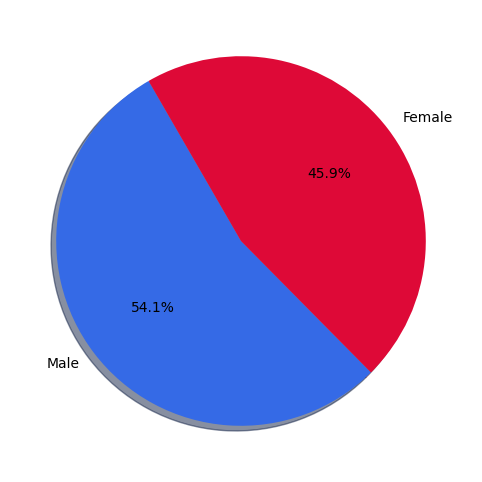

In [6]:
# Gender Representation
plt.figure(figsize=(9, 6))
plt.pie(df_eda['gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True, startangle=120, colors=["#356ae6", "#de0937"])
plt.show()

### <b>[HIPÓTESE 2] (age)</b>:

Clientes mais velhos tendem a aceitar mais o seguro de carro.

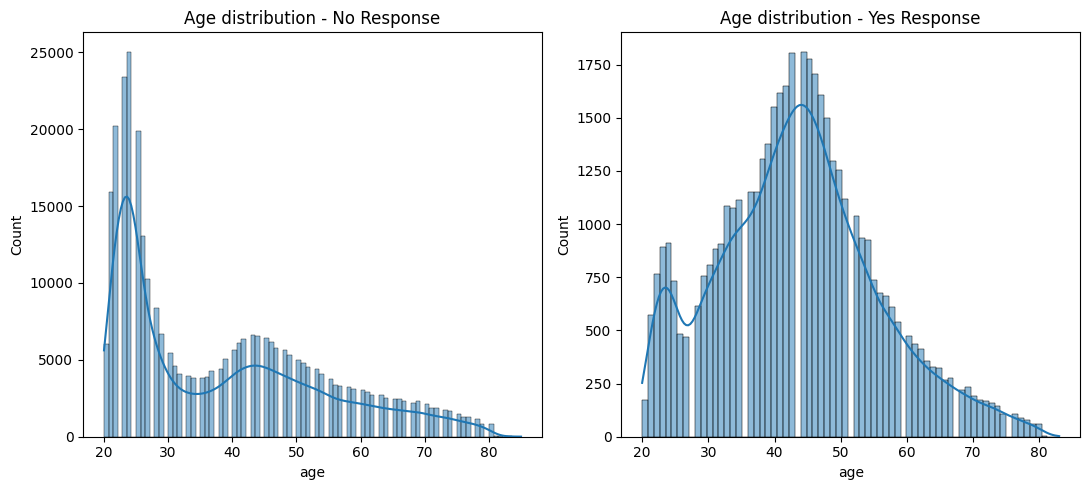

In [7]:
# age hist
df_aux1 = df_eda.loc[df_eda['response'] == 'No',:]
df_aux2 = df_eda.loc[df_eda['response'] == 'Yes',:]

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.title('Age distribution - No Response')
sns.histplot(df_aux1['age'], kde=True)

plt.subplot(1,2,2)
plt.title('Age distribution - Yes Response')
sns.histplot(df_aux2['age'], kde=True)

plt.tight_layout()


<Axes: title={'center': 'Age distribution by Response'}, xlabel='response', ylabel='age'>

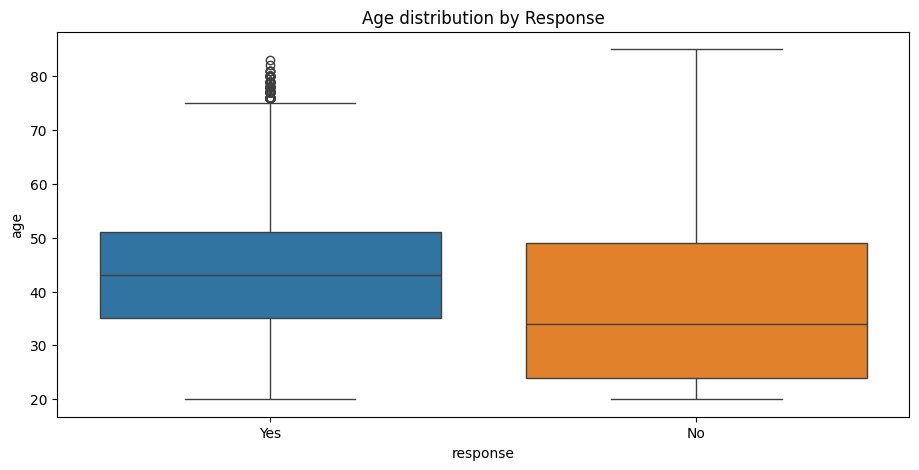

In [8]:
# age boxplot
plt.figure(figsize=(11,5))
plt.title('Age distribution by Response')
sns.boxplot(x='response', y='age', hue='response' ,data=df_eda)

### <b>[HIPÓTESE 3] (driving_license)</b>:

Espera-se uma resposta negativa da maioria dos clientes sem carteira de motorista.

In [10]:
# driving_license
df_aux3 = df_eda.loc[df_eda['driving_license'] == 'Has License',['driving_license', 'response']].groupby(['response']).count().reset_index()
df_aux3

,response,driving_license
0,No,333628
1,Yes,46669


Text(0.5, 1.0, 'Percentage of Customers with Driving License by Response')

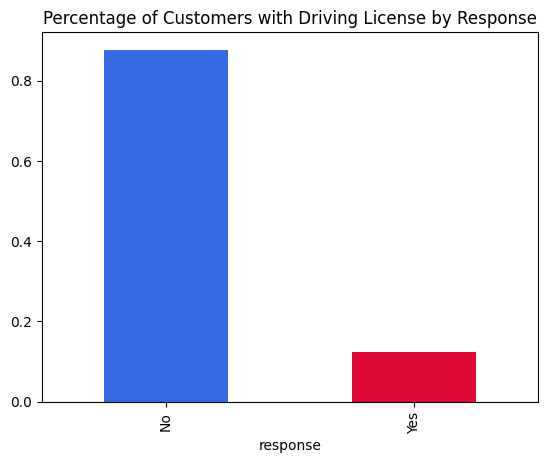

In [11]:
df_aux3['percentage'] = df_aux3['driving_license'] / df_aux3['driving_license'].sum()
df_aux3.plot(kind='bar', x='response', y='percentage', legend=False, color=['#356ae6', '#de0937'])
plt.title('Percentage of Customers with Driving License by Response')

### <b>[HIPÓTESE 4] (region_code)</b>:

Clientes em certas regiões tendem a aceitar mais (essa hipótese pode precisar de informações adicionais como um indicativo de periculosidade)

<Axes: xlabel='region_code', ylabel='id'>

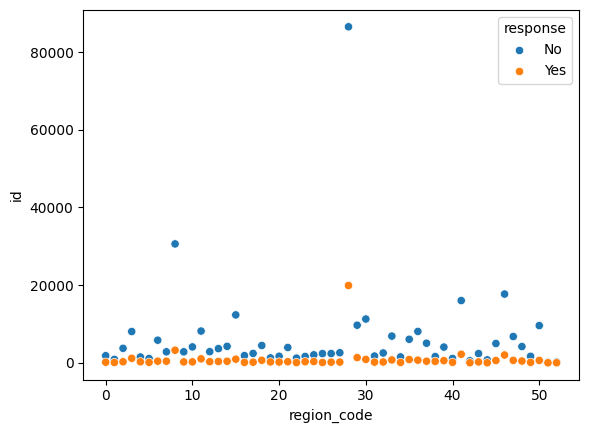

In [12]:
# region_code
df_aux = df_eda[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(data=df_aux, x= 'region_code', y='id', hue='response')

<Axes: xlabel='region_code', ylabel='id'>

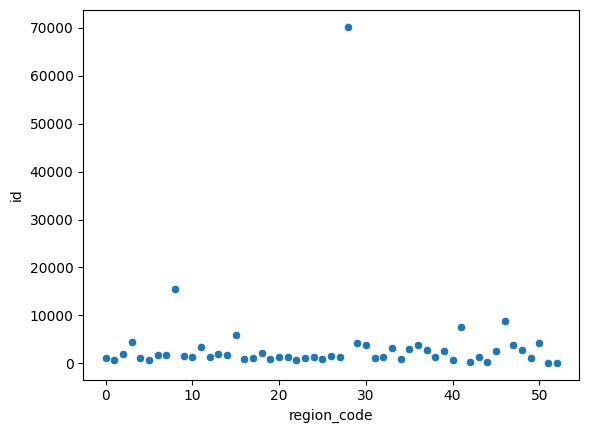

In [13]:
df_aux1 = df_eda[df_eda['vehicle_damage'] == 'Yes']
df_aux2 = df_aux1[['id', 'region_code']].groupby(['region_code']).count().reset_index()
sns.scatterplot(data=df_aux2, x='region_code', y='id')

### <b>[HIPÓTESE 5] (previously_insured)</b>:

<Axes: xlabel='previously_insured', ylabel='Count'>

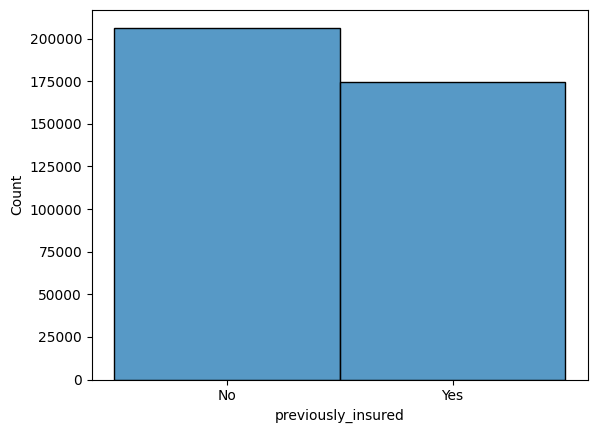

In [14]:
# previously_insured
sns.histplot(df_eda['previously_insured'])

<Axes: xlabel='previously_insured', ylabel='id'>

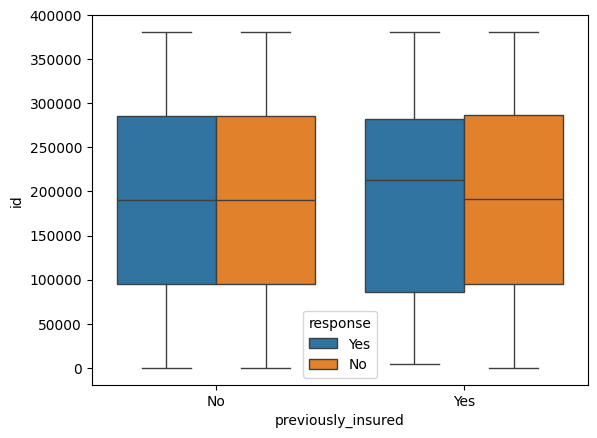

In [15]:
sns.boxplot(data=df_eda, x='previously_insured', y='id', hue='response')

In [16]:
pd.crosstab(df_eda['previously_insured'], df_eda['response']).apply(lambda x: x / x.sum(), axis= 1)

response,No,Yes
previously_insured,,
No,0.774546,0.225454
Yes,0.999095,0.000905


### <b>[HIPÓTESES 6 e 7] (vehicle_age)</b>:

In [ ]:
# vehicle_age proportion
df_eda[['vehicle_age', 'response']].value_counts(normalize=True, sort=False).reset_index()

,vehicle_age,response,proportion
0,Nearly New,No,0.434285
1,Nearly New,Yes,0.091328
2,New,No,0.413488
3,New,Yes,0.018897
4,Old,No,0.029663
5,Old,Yes,0.012338


In [18]:
# Vehicle age distribution
df_eda['vehicle_age'].value_counts()

vehicle_age
Nearly New    200316
New           164786
Old            16007
Name: count, dtype: int64

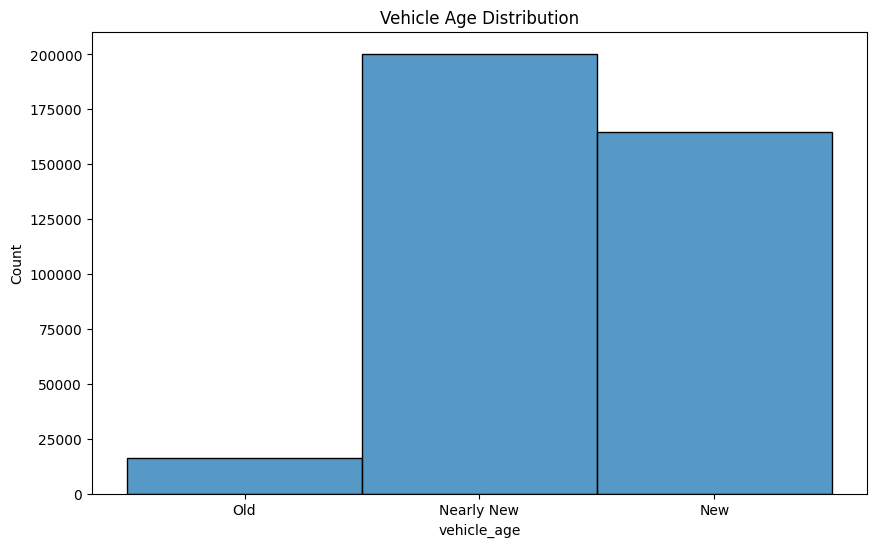

In [23]:
# Vehicle age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_eda['vehicle_age'])
plt.title('Vehicle Age Distribution')
plt.show()

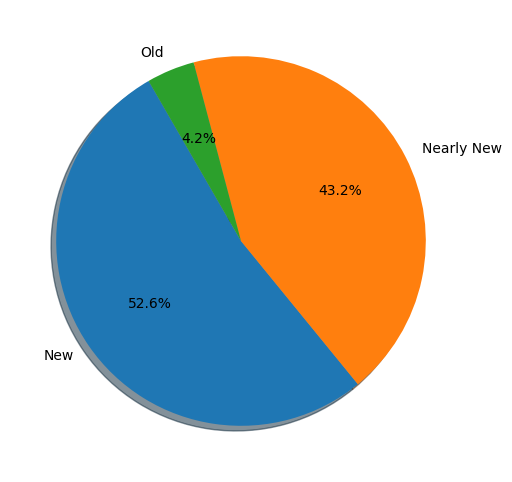

In [24]:
# Vehicle Representation
plt.figure(figsize=(9, 6))
plt.pie(df_eda['vehicle_age'].value_counts(), labels=['New', 'Nearly New', 'Old'], autopct='%1.1f%%', shadow=True, startangle=120)
plt.show()

### <b>[HIPÓTESES 9 e 10] (policy_sales_channel)</b>:

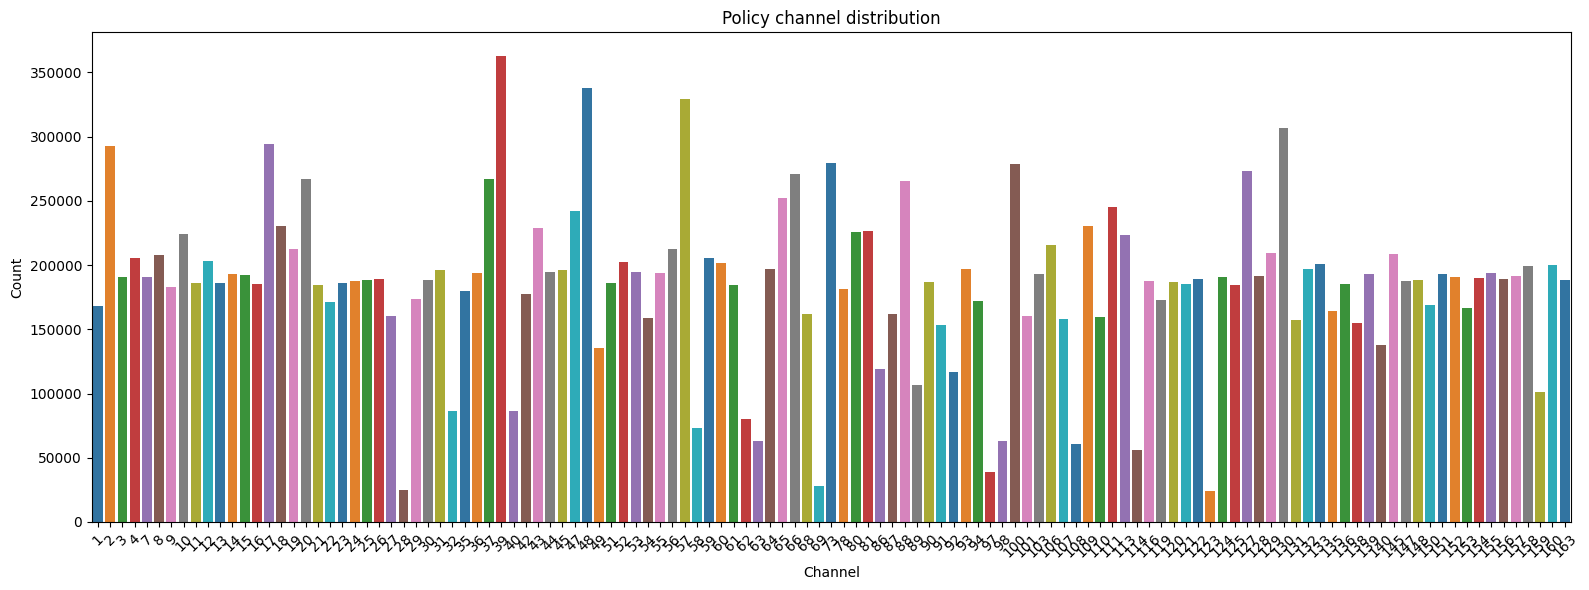

In [19]:
# policy_sales_channel

df_aux1 = df_eda[df_eda['response'] == 'Yes']

plt.figure(figsize=(16,6))
sns.barplot(x='policy_sales_channel', y='id', data=df_aux1, palette='tab10', hue='policy_sales_channel', legend=False, errorbar=None);
plt.title('Policy channel distribution')
plt.tick_params(axis='x', labelrotation= 45)
plt.xlabel('Channel')
plt.ylabel('Count')
plt.tight_layout()

In [20]:
# Top 10 most sucessful sales channel
df_aux1 = df_eda.loc[df_eda['response'] == 'Yes',:]
df_aux2 = df_aux1.loc[:,['policy_sales_channel', 'response']].groupby('policy_sales_channel').count().sort_values(by='response', ascending=False).reset_index().head(10)
df_aux2

,policy_sales_channel,response
0,26,15891
1,124,13996
2,152,3858
3,156,2297
4,157,1794
5,122,1720
6,154,1474
7,163,880
8,160,475
9,155,395


Text(0, 0.5, 'response count')

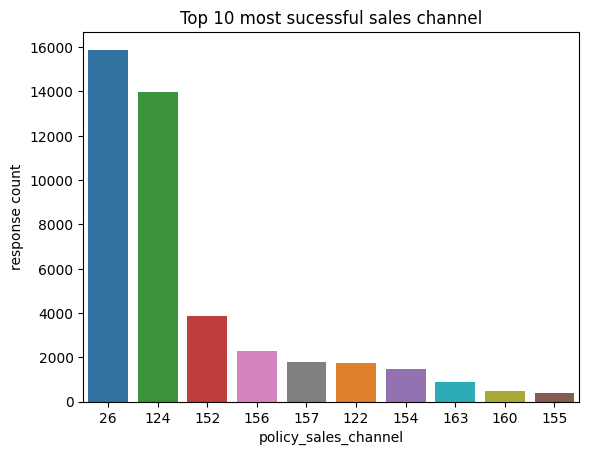

In [21]:
sns.barplot(data=df_aux2,x='policy_sales_channel', y='response', order=df_aux2['policy_sales_channel'], palette='tab10', hue='policy_sales_channel', legend=False)
plt.title('Top 10 most sucessful sales channel')
plt.ylabel('response count')

### <b>[HIPÓTESE 11] (annual_premium)</b>:

In [1]:
# annual_premium
df_aux = df_eda[(df_eda['annual_premium'] < 60000) & (df_eda['annual_premium'] > 10000) ]
sns.boxplot(x='response', y='annual_premium', data=df_aux, palette='tab10',hue='response', legend=False)

NameError: name 'df_eda' is not defined

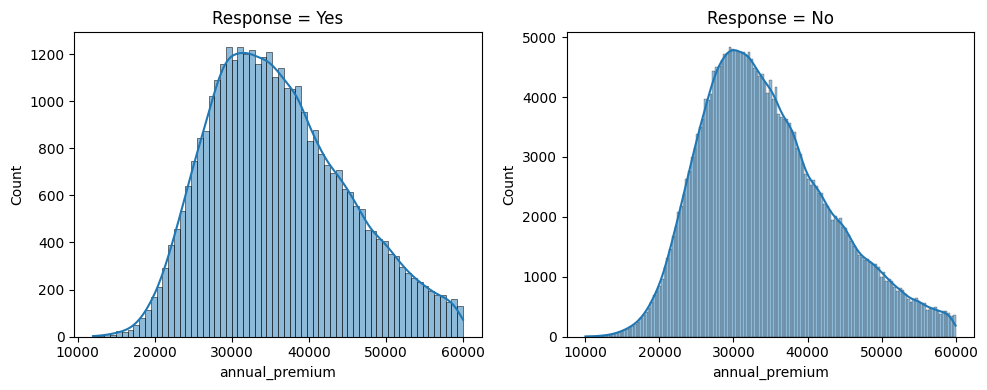

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Response = Yes')
df_aux2 = df_aux.loc[df_aux['response'] == 'Yes', 'annual_premium']
sns.histplot(df_aux2, kde=True)

plt.subplot(1,2,2)
plt.title('Response = No')
df_aux2 = df_aux.loc[df_aux['response'] == 'No', 'annual_premium']
sns.histplot(df_aux2, kde=True)

plt.tight_layout()

### <b>[HIPÓTESE 12] (vintage)</b>:

In [22]:
# Min max fidelity time of clients
print(f'Max years as client: {df_eda["vintage"].max()} years \nMin years as client: {df_eda["vintage"].min()} years')

Max years as client: 299 years 
Min years as client: 10 years


<Axes: xlabel='response', ylabel='vintage'>

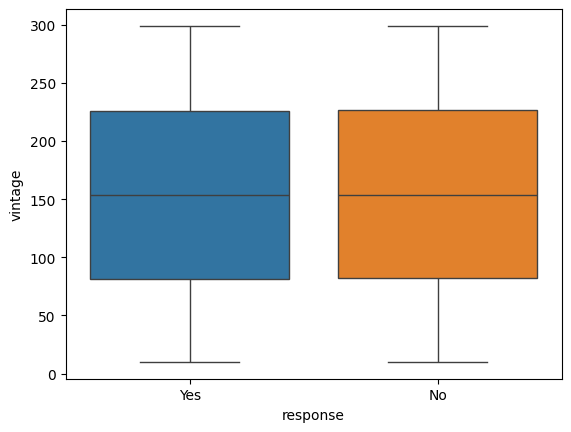

In [42]:
# vintage distribution
sns.boxplot(x='response', y='vintage', data=df_aux, palette='tab10',hue='response', legend=False)

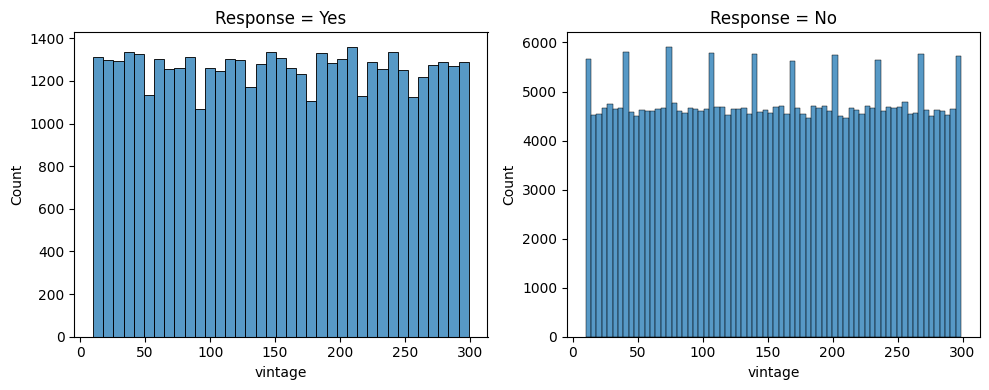

In [ ]:
# vintage by response
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Response = Yes')
df_aux2 = df_eda.loc[df_eda['response'] == 'Yes', 'vintage']
sns.histplot(df_aux2)

plt.subplot(1,2,2)
plt.title('Response = No')
df_aux2 = df_eda.loc[df_eda['response'] == 'No', 'vintage']
sns.histplot(df_aux2)

plt.tight_layout()

## 1.3 Multivariate Analysis